In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from google.colab import files

In [2]:
# Upload dataset to Colab workspace
uploaded = files.upload()

Saving Tesla Deaths - Deaths.csv to Tesla Deaths - Deaths.csv


In [3]:
os.getcwd()

'/content'

In [4]:
os.listdir()

['.config', 'Tesla Deaths - Deaths.csv', 'sample_data']

## Step 2.a

In [57]:
# Import the dataset into a DataFrame

tesla_death = pd.read_csv('Tesla Deaths - Deaths.csv')
tesla_death.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,-,-,1,...,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN,NaN,NaN,NaN,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,-,-,...,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN,NaN,NaN,NaN,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN


In [58]:
tesla_death.shape

(309, 24)

In [59]:
# Print the column headers

col_names = tesla_death.columns
print(col_names)

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')


## Step 2.b

In [60]:
# Delete all columns whose headers contain the word “Deceased”

deceased_cols = [cn for cn in col_names if 'Deceased' in cn]
print(deceased_cols)
tesla_death = tesla_death.drop(deceased_cols, axis = 1)
print('\nNew set of column names:\n')
col_names = tesla_death.columns
print(col_names)

[' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ']

New set of column names:

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note '],
      dtype='object')


In [61]:
# Delete all columns that contain weblinks

tesla_death = tesla_death.drop(['Unnamed: 16', 'Unnamed: 17', ' Source '], axis = 1)
print('\nNew set of column names:\n')
col_names = tesla_death.columns.values
print(col_names)


New set of column names:

['Case #' 'Year' 'Date' ' Country ' ' State ' ' Description ' ' Deaths '
 ' Tesla driver ' ' Tesla occupant ' ' Other vehicle ' ' Cyclists/ Peds '
 ' TSLA+cycl / peds ' ' Model ' ' Autopilot claimed '
 ' Verified Tesla Autopilot Deaths '
 ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '
 ' Note ']


In [62]:
tesla_death.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,-,-,1,-,-,-,-,-,-,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,-,-,-,1,-,-,-,-,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-,NaN
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-,NaN


## Preprocessing

In [63]:
# Check the data types of each field

tesla_death.dtypes

Case #                                                                  float64
Year                                                                    float64
Date                                                                     object
 Country                                                                 object
 State                                                                   object
 Description                                                             object
 Deaths                                                                 float64
 Tesla driver                                                            object
 Tesla occupant                                                          object
 Other vehicle                                                           object
 Cyclists/ Peds                                                          object
 TSLA+cycl / peds                                                        object
 Model                                  

In [75]:
tesla_death = tesla_death.astype({'Year':'str', ' Deaths ':'str'})
tesla_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 17 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                296 non-null    float64
 1   Year                                                                  296 non-null    object 
 2   Date                                                                  296 non-null    object 
 3    Country                                                              296 non-null    object 
 4    State                                                                296 non-null    object 
 5    Description                                                          296 non-null    object 
 6    Deaths                                                               296 non-null    object 
 7  

In [65]:
tesla_death.tail(15)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
294,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,1,1,-,-,-,-,NaN
295,1.0,2013.0,4/2/2013,USA,CA,Tesla veers into opposite lane,2.0,-,-,2,-,-,S,-,-,-,NaN
296,NaN,NaN,NaN,NaN,NaN,NaN,92.0,28,7,29,20,61,NaN,8,3,3,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,263.0,90,41,102,26,150,NaN,30,16,24,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,355.0,118,48,131,46,211,NaN,38,19,27,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6,5,16,11,21,50,48,75,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,2014,2015,2016,2017,2018,2019,2020,2021,NaN,NaN


In [66]:
tesla_death = tesla_death.drop(range(296, 309))
tesla_death.tail()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
291,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,-,-,-,-,-,-,NaN
292,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,-,1,-,-,-,-,NaN
293,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,-,-,-,-,-,-,NaN
294,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,1,1,-,-,-,-,NaN
295,1.0,2013.0,4/2/2013,USA,CA,Tesla veers into opposite lane,2.0,-,-,2,-,-,S,-,-,-,NaN


In [67]:
tesla_death[' Tesla occupant '].unique()

array([' - ', '1', '3', nan, '2'], dtype=object)

In [68]:
tesla_death = tesla_death.replace({' - ': np.nan})
tesla_death.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [69]:
tesla_death.fillna('0', inplace = True)
tesla_death.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Note
0,296.0,2022.0,1/30/2023,USA,MO,Speeding Tesla crashes into car,1.0,0,0,1,0,0,0,0,0,0,0
1,295.0,2022.0,1/21/2023,USA,CA,Tesla crashses into resident's pool,1.0,1,0,0,0,1,0,0,0,0,0
2,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,0,0,0,0,0
3,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,0,0,0,1,0,0,0,0,0
4,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,0,0,0,0,0


## Step 2.c

In [70]:
tesla_death.columns.values

array(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ',
       ' Other vehicle ', ' Cyclists/ Peds ', ' TSLA+cycl / peds ',
       ' Model ', ' Autopilot claimed ',
       ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       ' Note '], dtype=object)

In [71]:


#tesla_death.groupby([' Deaths '])

array([[<Axes: title={'center': '2013.0'}>,
        <Axes: title={'center': '2014.0'}>,
        <Axes: title={'center': '2015.0'}>],
       [<Axes: title={'center': '2016.0'}>,
        <Axes: title={'center': '2017.0'}>,
        <Axes: title={'center': '2018.0'}>],
       [<Axes: title={'center': '2019.0'}>,
        <Axes: title={'center': '2020.0'}>,
        <Axes: title={'center': '2021.0'}>],
       [<Axes: title={'center': '2022.0'}>, <Axes: >, <Axes: >]],
      dtype=object)

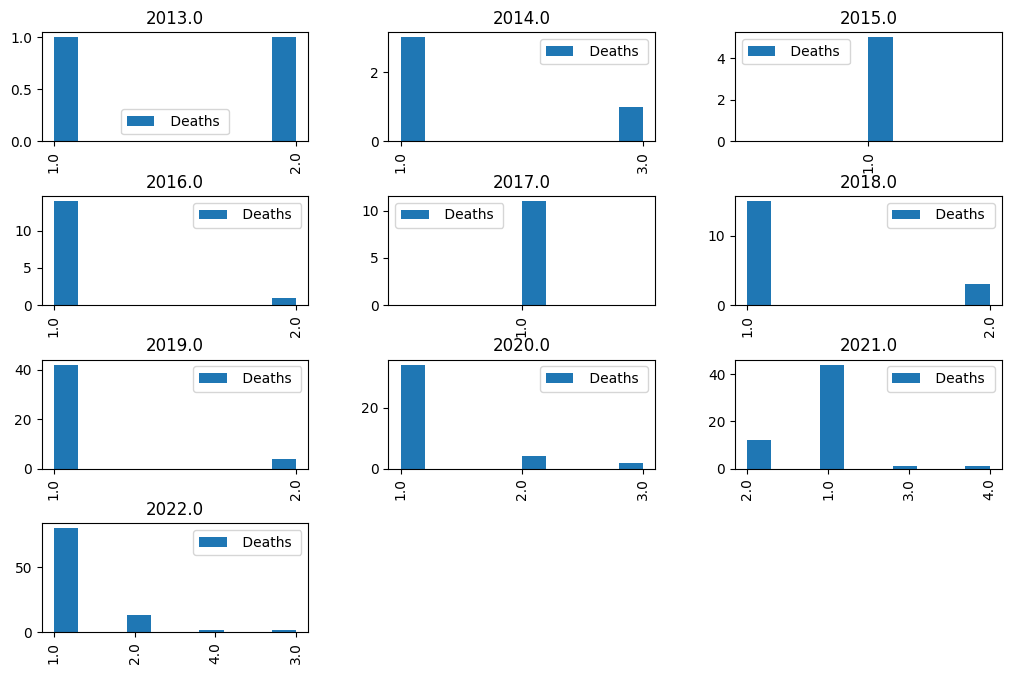

In [76]:
# To plot the histogram of Number of deaths v.s. Year.

tesla_death.hist(' Deaths ', by='Year', figsize=(12,8), legend = 'Frequency of number of deaths V/S Year')

<Axes: title={'center': 'Total Deaths V/S Year'}, xlabel='Year', ylabel='Total Deaths'>

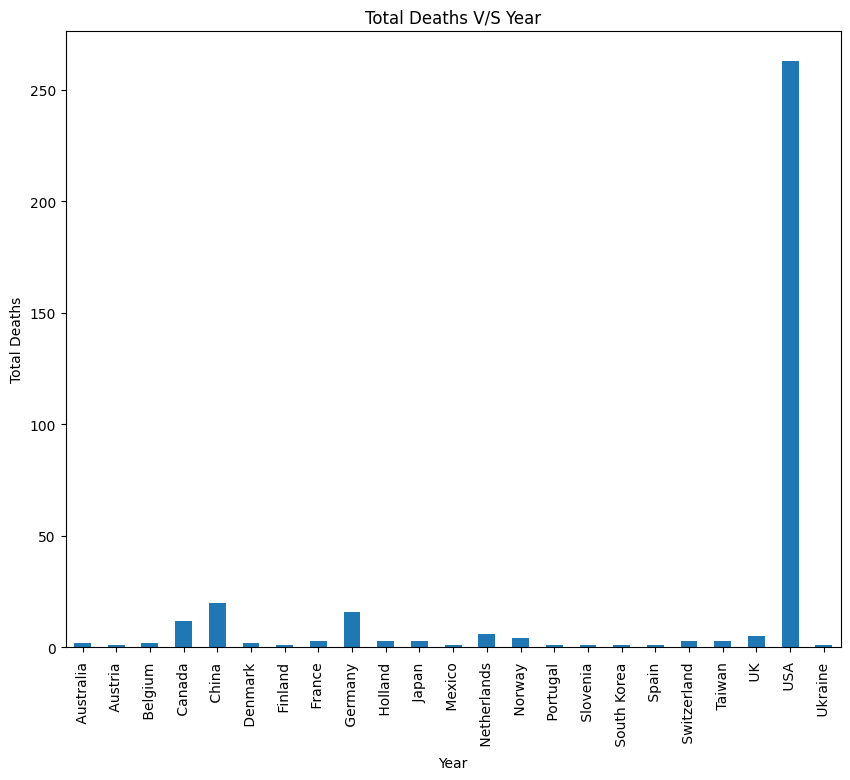

In [86]:
tesla_death = tesla_death.astype({' Deaths ':'float64'})

country_death_grp = tesla_death.groupby(' Country ')[' Deaths '].sum()
country_death_grp.plot(kind='bar', title='Total Deaths V/S Year',
               ylabel='Total Deaths', xlabel='Year', figsize=(10, 8))

<Axes: title={'center': 'Total Deaths state-wise'}, xlabel='US States', ylabel='Total Deaths'>

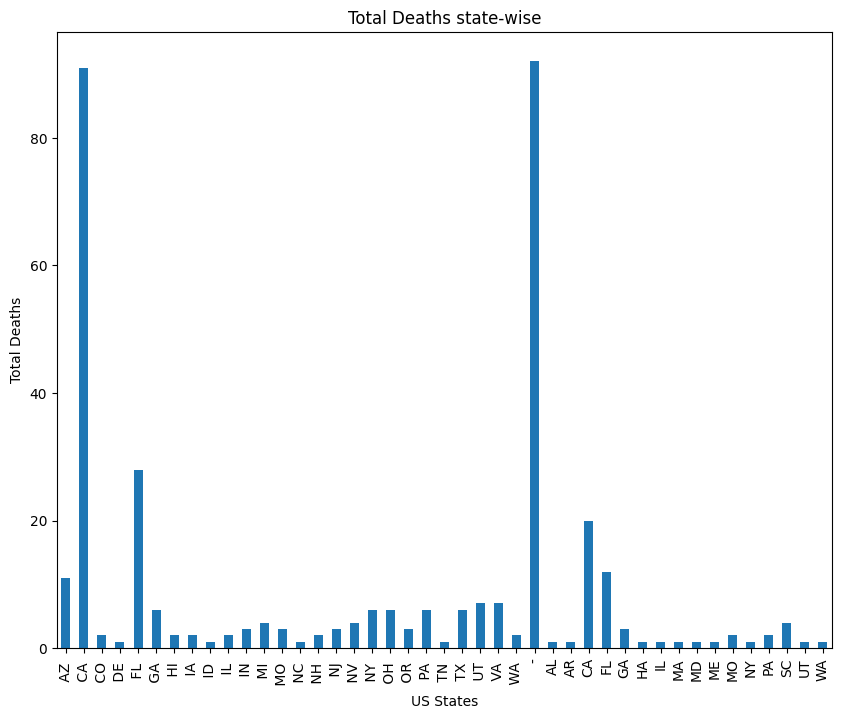

In [89]:
tesla_state = tesla_death.groupby( ' State ')[' Deaths '].sum()

tesla_state.plot(kind='bar', title='Total Deaths state-wise',
               ylabel='Total Deaths', xlabel='US States', figsize=(10, 8))

118
48
131
46


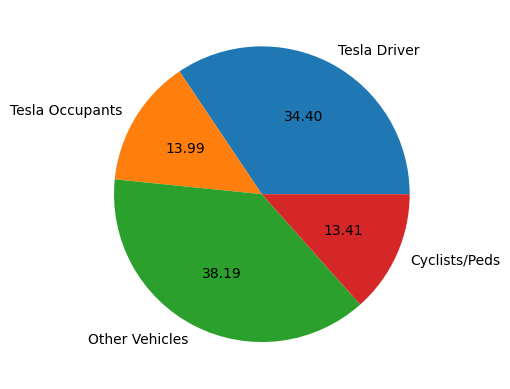

In [92]:
tesla_death = tesla_death.astype({' Tesla driver ':'int32', ' Tesla occupant ':'int32', ' Other vehicle ':'int32', ' Cyclists/ Peds ':'int32'})
driver_sum = tesla_death[" Tesla driver "].sum()
print(tslaDriver_sum)

occupant_sum = tesla_death[" Tesla occupant "].sum()
print(tslaOcc_sum)

other_veh_sum =  tesla_death[" Other vehicle "].sum()
print(othVeh_sum)

cyc_sum = tesla_death[' Cyclists/ Peds '].sum()
print(cycPeds_sum)

plt.pie([driver_sum, occupant_sum, other_veh_sum, cyc_sum], labels = ['Tesla Driver', 'Tesla Occupants', 'Other Vehicles', 'Cyclists/Peds'], autopct="%.2f" )
plt.show()